# STOCK EXCHANGE

### Librerías

In [1]:
#!pip install yfinance
#!pip install pymysql
import pandas as pd
import yfinance as yf
import mysql.connector
import sqlalchemy as db


### Conexion a motor base de datos

In [2]:
database_username='root'
database_password=''
database_ip='localhost'
database_name='stock_exchange'

database_connection=db.create_engine('mysql+pymysql://{0}:{1}@{2}/{3}'.
                                     format(database_username, database_password, database_ip, database_name))

### Listado de Stocks para trabajar

In [8]:
datos=pd.read_csv("lista.csv",sep=";")
datos

,continente,pais,nombre,Ticket,nombre2
0,Europa,España,IBEX Limited,IBEX,IBEX
1,Europa,Gran Bretaña,FTSE 100,^FTSE,FTSE
2,Europa,Francia,CAC 40,^FCHI,FCHI
3,Europa,Alemania,Global X DAX Germany ETF,DAX,DAX
4,Europa,Italia,FTSE MIB,FTSEMIB.MI,FTSEMIBMI
5,Europa,Paises Bajos,AEX-Index,^AEX,AEX
6,Europa,Europa,Eurostoxx 50,BBVAE.MC,BBVAEMC
7,Asia,Hong Kong,HANG SENG INDEX,^HSI,HSI
8,Asia,China,Hang Seng China Enterprises Index ETF,2828.HK,2828HK
9,Asia,India,NIFTY 50,^NSEI,NSEI


## Funciones de Creación y eliminación

### Función eliminar tabla existente

In [5]:
def elimina_tabla(tabla):
    conn = mysql.connector.connect(user='root', password='', host='localhost', database='stock_exchange')
    cursor = conn.cursor()
    cursor.execute("DROP TABLE IF EXISTS "+tabla)
    conn.close()

### Función Crear Tabla en motor

In [6]:
def crea_stock(stock, nombre):
    stocks=yf.download(stock, start='2019-1-1', end='2023-3-25')
    stocks.reset_index(inplace=True)
    stocks=stocks.drop(['Adj Close'], axis=1)
    stocks=pd.DataFrame(stocks)
    stocks.to_sql(name=str(nombre), con=database_connection)

### Actualizar Bases de Datos

In [10]:
for ticket, nombre in zip(datos['Ticket'], datos['nombre2']):
    elimina_tabla(nombre)
    crea_stock(ticket, nombre) 
    #print(ticket)

[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'IBEX' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'FTSE' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'FCHI' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'DAX' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'FTSEMIBMI' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'AEX' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'BBVAEMC' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'HSI' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name '2828HK' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'NSEI' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'N225' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'KS11' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'KLSE' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'ES3SI' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'DJI' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'IXIC' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'GSPC' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'BVSP' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'MXX' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


[*********************100%***********************]  1 of 1 completed


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'MBA' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


## Creación de Modelos

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Llamar base desde motor

In [44]:
conn = mysql.connector.connect(user='root', password='', host='localhost', database='stock_exchange')
stock = pd.DataFrame(pd.read_sql("SELECT * FROM dax",conn))
conn.close()

In [45]:
stock['Date']=pd.to_datetime(stock['Date'], format='%Y/%m/%d')
stock=stock.drop(['index'], axis=1)
stock=stock.set_index('Date')
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2019-01-02 to 2023-03-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1060 non-null   float64
 1   High    1060 non-null   float64
 2   Low     1060 non-null   float64
 3   Close   1060 non-null   float64
 4   Volume  1060 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 49.7 KB


In [46]:
stock2=stock.asfreq(freq ='D', method='ffill')
stock2=stock2.sort_index()
stock2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,23.521999,23.570,23.420000,23.549999,3700
2019-01-03,23.490000,23.490,23.209999,23.250000,7000
2019-01-04,23.580000,24.188,23.580000,24.188000,2600
2019-01-05,23.580000,24.188,23.580000,24.188000,2600
2019-01-06,23.580000,24.188,23.580000,24.188000,2600


#### Entrenamiento y Prueba

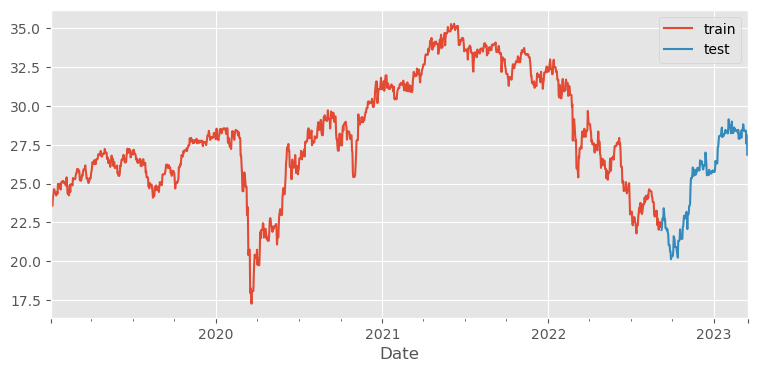

In [47]:
steps=int(stock2.size*0.025)
stock2_train=stock2[:-steps]
stock2_test=stock2[-steps:]

fig, ax=plt.subplots(figsize=(9,4))
stock2_train['Open'].plot(ax=ax, label='train')
stock2_test['Open'].plot(ax=ax, label='test')
ax.legend()
plt.show()

## Forecat con Random Forest

In [48]:
forescaster_rf=ForecasterAutoreg(regressor=RandomForestRegressor(random_state=25), lags=6)
forescaster_rf.fit(y=stock2_train['Open'])
forescaster_rf

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=25) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-02 00:00:00'), Timestamp('2022-09-06 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 25, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-03-19 12:42:09 
Last fit date: 2023-03-19 12:42:10 
Skforecast version: 0.6.0 
Python version: 3.9.13 

In [49]:
steps=int(stock2.size*0.025)
predicciones=forescaster_rf.predict(steps= steps)
predicciones=pd.Series(data=predicciones, index=stock2_test['Open'].index)
predicciones.head()

Date
2022-09-07    22.0943
2022-09-08    22.1442
2022-09-09    22.1123
2022-09-10    22.0990
2022-09-11    22.1389
Freq: D, Name: pred, dtype: float64

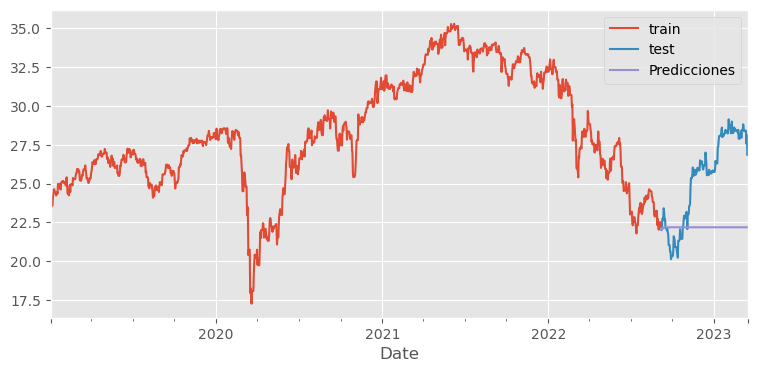

In [50]:
fig, ax=plt.subplots(figsize=(9,4))
stock2_train['Open'].plot(ax=ax, label='train')
stock2_test['Open'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='Predicciones')
ax.legend()

### Modelo Integrado ARIMA

In [51]:
import time
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

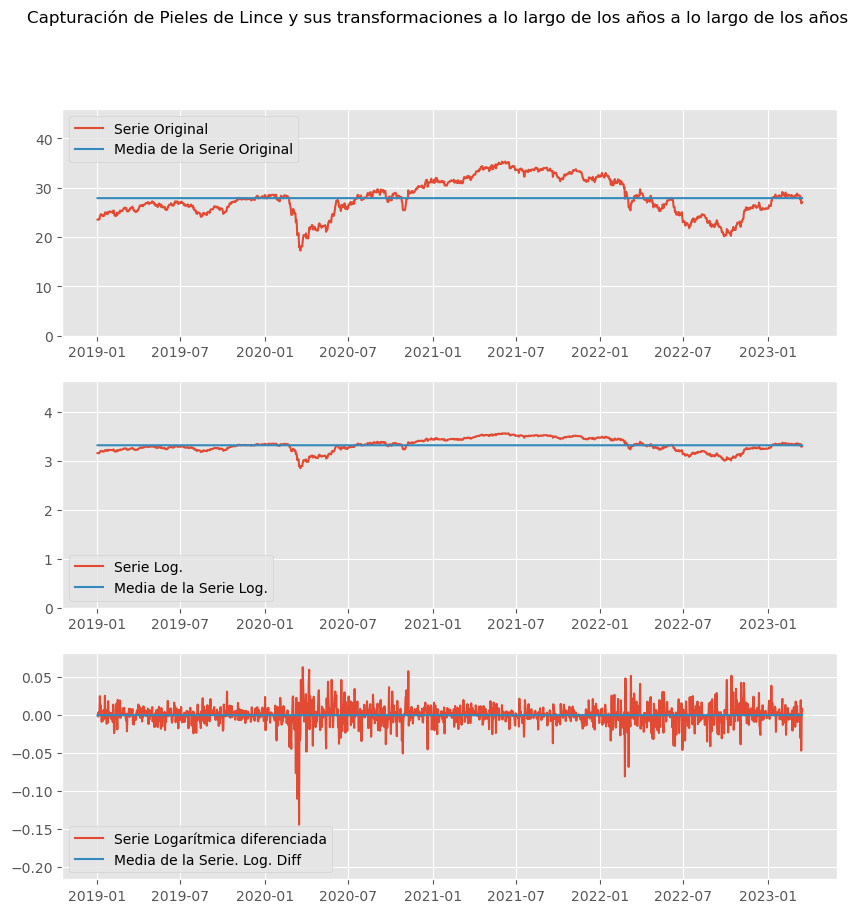

In [52]:
# Derivación en logaritmos para determinar crecimiento y estacionalidad
stock2["Open_log"] =stock2["Open"].apply(np.log)
stock2["Open_log_diff"] = stock2["Open_log"].diff()

x = stock2.index

y = stock2["Open"]
y_media = [np.mean(y) for _ in y]

y_log = stock2["Open_log"]
y_log_media = [np.mean(y_log) for _ in y_log]

y_log_diff = stock2["Open_log_diff"]
y_log_diff_mean = [np.mean(y_log_diff) for _ in y_log_diff]

fig = plt.figure(figsize = (10, 10))
ax1, ax2, ax3 = fig.subplots(3, 1)

ax1.plot(x, y, label = "Serie Original")
ax1.plot(x, y_media, label = "Media de la Serie Original")
ax1.set_ylim(0, np.max(y)*1.3)
ax1.legend(loc = "upper left")

ax2.plot(x, y_log, label = "Serie Log.")
ax2.plot(x, y_log_media, label = "Media de la Serie Log.")
ax2.set_ylim(0, np.max(y_log)*1.3)
ax2.legend(loc = "lower left")


ax3.plot(x, y_log_diff, label = "Serie Logarítmica diferenciada")
ax3.plot(x, y_log_diff_mean, label = "Media de la Serie. Log. Diff")
ax3.set_ylim(np.min(y_log_diff)*1.5, np.max(y_log_diff)*1.3)
ax3.legend(loc = "lower left")

fig.suptitle("Capturación de Pieles de Lince y sus transformaciones a lo largo de los años a lo largo de los años");

In [53]:
y_log_diff=y_log_diff.fillna(0)
for serie, nombre_serie in zip([y, y_log, y_log_diff], ["Serie Original", "Serie Log.", "Serie. Log. Diff"]):
    
    print("------------------------------------------------------------------")
    
    print("Estamos trabajando con la serie {}\n".format(nombre_serie))
    resultado_analisis = adfuller(serie)
    
    valor_estadistico_adf = resultado_analisis[0]
    p_valor = resultado_analisis[1]
    
    print("Valor estadistico de ADF de las tablas precalculadas: {}".format(-2.89))
    print("Valor estadistico de ADF: {}\n".format(valor_estadistico_adf))
    
    print("Nivel de significación para tomar la serie como estacionaria {}".format(0.05))
    print("p-valor: {}\n".format(p_valor))

------------------------------------------------------------------
Estamos trabajando con la serie Serie Original

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -1.9907475369435457

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 0.29064465953225577

------------------------------------------------------------------
Estamos trabajando con la serie Serie Log.

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -2.15615857610119

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 0.222540187079034

------------------------------------------------------------------
Estamos trabajando con la serie Serie. Log. Diff

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -12.135611942888913

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 1.6963402327417204e-22



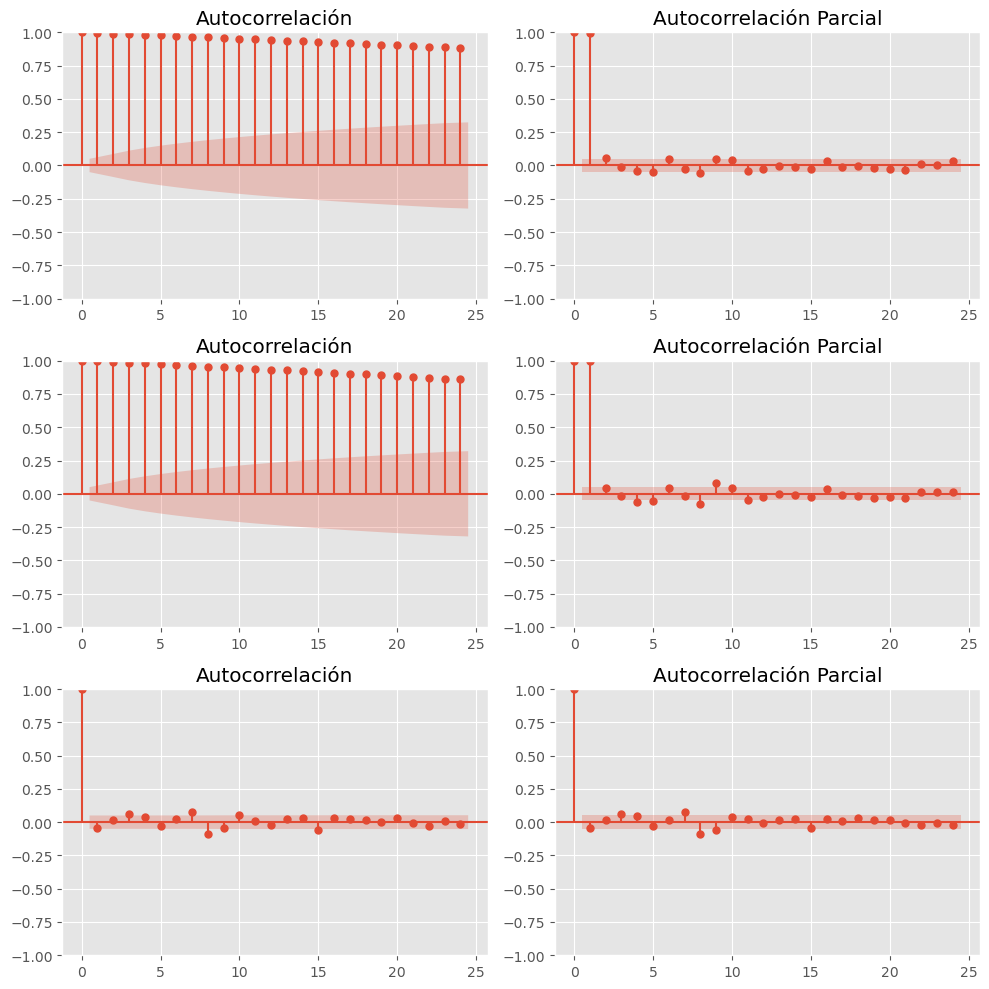

In [54]:
LAGS = 24

fig = plt.figure(figsize = (10, 10))

((ax1, ax2), (ax3, ax4), (ax5, ax6)) = fig.subplots(3, 2)

# ----------------------------------------------------------------------------------------------------
# plot the data using the built in plots from the stats module
plot_acf(y, ax = ax1, lags = LAGS, title = "Autocorrelación")
plot_pacf(y, ax = ax2, lags = LAGS, title = "Autocorrelación Parcial")

plot_acf(y_log, ax = ax3, lags = LAGS, title = "Autocorrelación")
plot_pacf(y_log, ax = ax4, lags = LAGS, title = "Autocorrelación Parcial")

plot_acf(y_log_diff, ax = ax5, lags = LAGS, title = "Autocorrelación")
plot_pacf(y_log_diff, ax = ax6, lags = LAGS, title = "Autocorrelación Parcial")

fig.tight_layout()

In [55]:
serie_a_predecir = y_log
y_index = serie_a_predecir.index

date_train = int(len(y_index)*0.9)

y_train = serie_a_predecir[y_index[:date_train]]
y_test = serie_a_predecir[y_index[date_train:len(y_index)]]

In [56]:
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 0)]

st = time.time()

best_score = 0
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # guardamos el mejor resultado
            if best_score == 0:
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
                
            elif abs(results.aic) < abs(best_score):
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
            
        # alguna combinación de parámetros en SARIMAX, no son válidos
        # y los vamos a cazar con un except
        except:
            continue

et = time.time()

print("La búsqueda de parámetros no ha llevado {} minutos!".format((et - st)/60))

ARIMA(0, 0, 0)x(0, 0, 0, 0)12 - AIC:7241.9652574621305
ARIMA(0, 0, 1)x(0, 0, 0, 0)12 - AIC:5336.9462721010395
ARIMA(0, 0, 2)x(0, 0, 0, 0)12 - AIC:3511.355740232765
ARIMA(0, 0, 3)x(0, 0, 0, 0)12 - AIC:1921.4692804665528
ARIMA(0, 0, 4)x(0, 0, 0, 0)12 - AIC:578.6913572157218
ARIMA(0, 1, 0)x(0, 0, 0, 0)12 - AIC:-8002.308091687727
ARIMA(0, 1, 1)x(0, 0, 0, 0)12 - AIC:-7995.491905420403
ARIMA(0, 1, 2)x(0, 0, 0, 0)12 - AIC:-7987.602031634497
ARIMA(0, 1, 3)x(0, 0, 0, 0)12 - AIC:-7983.757842307947
ARIMA(0, 1, 4)x(0, 0, 0, 0)12 - AIC:-7980.034509211735
ARIMA(0, 2, 0)x(0, 0, 0, 0)12 - AIC:-6995.849399134793
ARIMA(0, 2, 1)x(0, 0, 0, 0)12 - AIC:-7981.137271003376
ARIMA(0, 2, 2)x(0, 0, 0, 0)12 - AIC:-7974.334926227639
ARIMA(0, 2, 3)x(0, 0, 0, 0)12 - AIC:-7968.799679976806
ARIMA(0, 2, 4)x(0, 0, 0, 0)12 - AIC:-7964.40016922058
ARIMA(0, 3, 0)x(0, 0, 0, 0)12 - AIC:-5457.051072516901
ARIMA(0, 3, 1)x(0, 0, 0, 0)12 - AIC:-6975.58277035643
ARIMA(0, 3, 2)x(0, 0, 0, 0)12 - AIC:-7952.280250941776
ARIMA(0, 3, 3)

In [57]:
print("El mejor modelo es {}, \nCon un AIC de {}".format(best_params, best_score))

El mejor modelo es (0, 0, 4), 
Con un AIC de 578.6913572157218


In [58]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order = best_params,
                                seasonal_order = param_seasonal,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

In [59]:
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          3.0897      0.017    185.120      0.000       3.057       3.122
ma.L2          4.1824      0.040    104.324      0.000       4.104       4.261
ma.L3          2.9099      0.040     72.864      0.000       2.832       2.988
ma.L4          0.8740      0.016     53.086      0.000       0.842       0.906
sigma2         0.0889      0.009     10.195      0.000       0.072       0.106


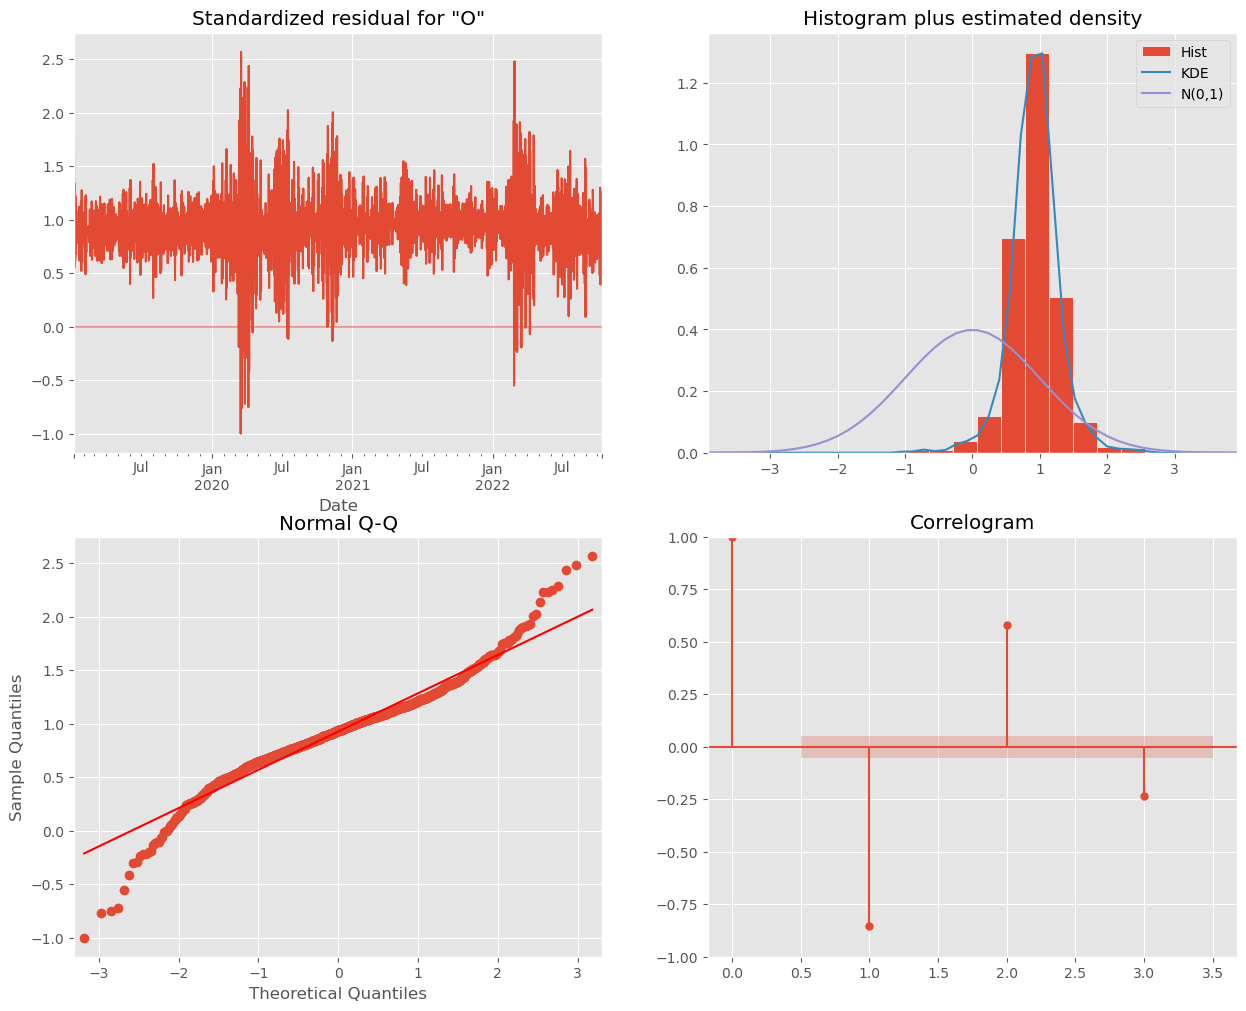

In [60]:
results.plot_diagnostics(figsize = (15, 12), lags = 3);

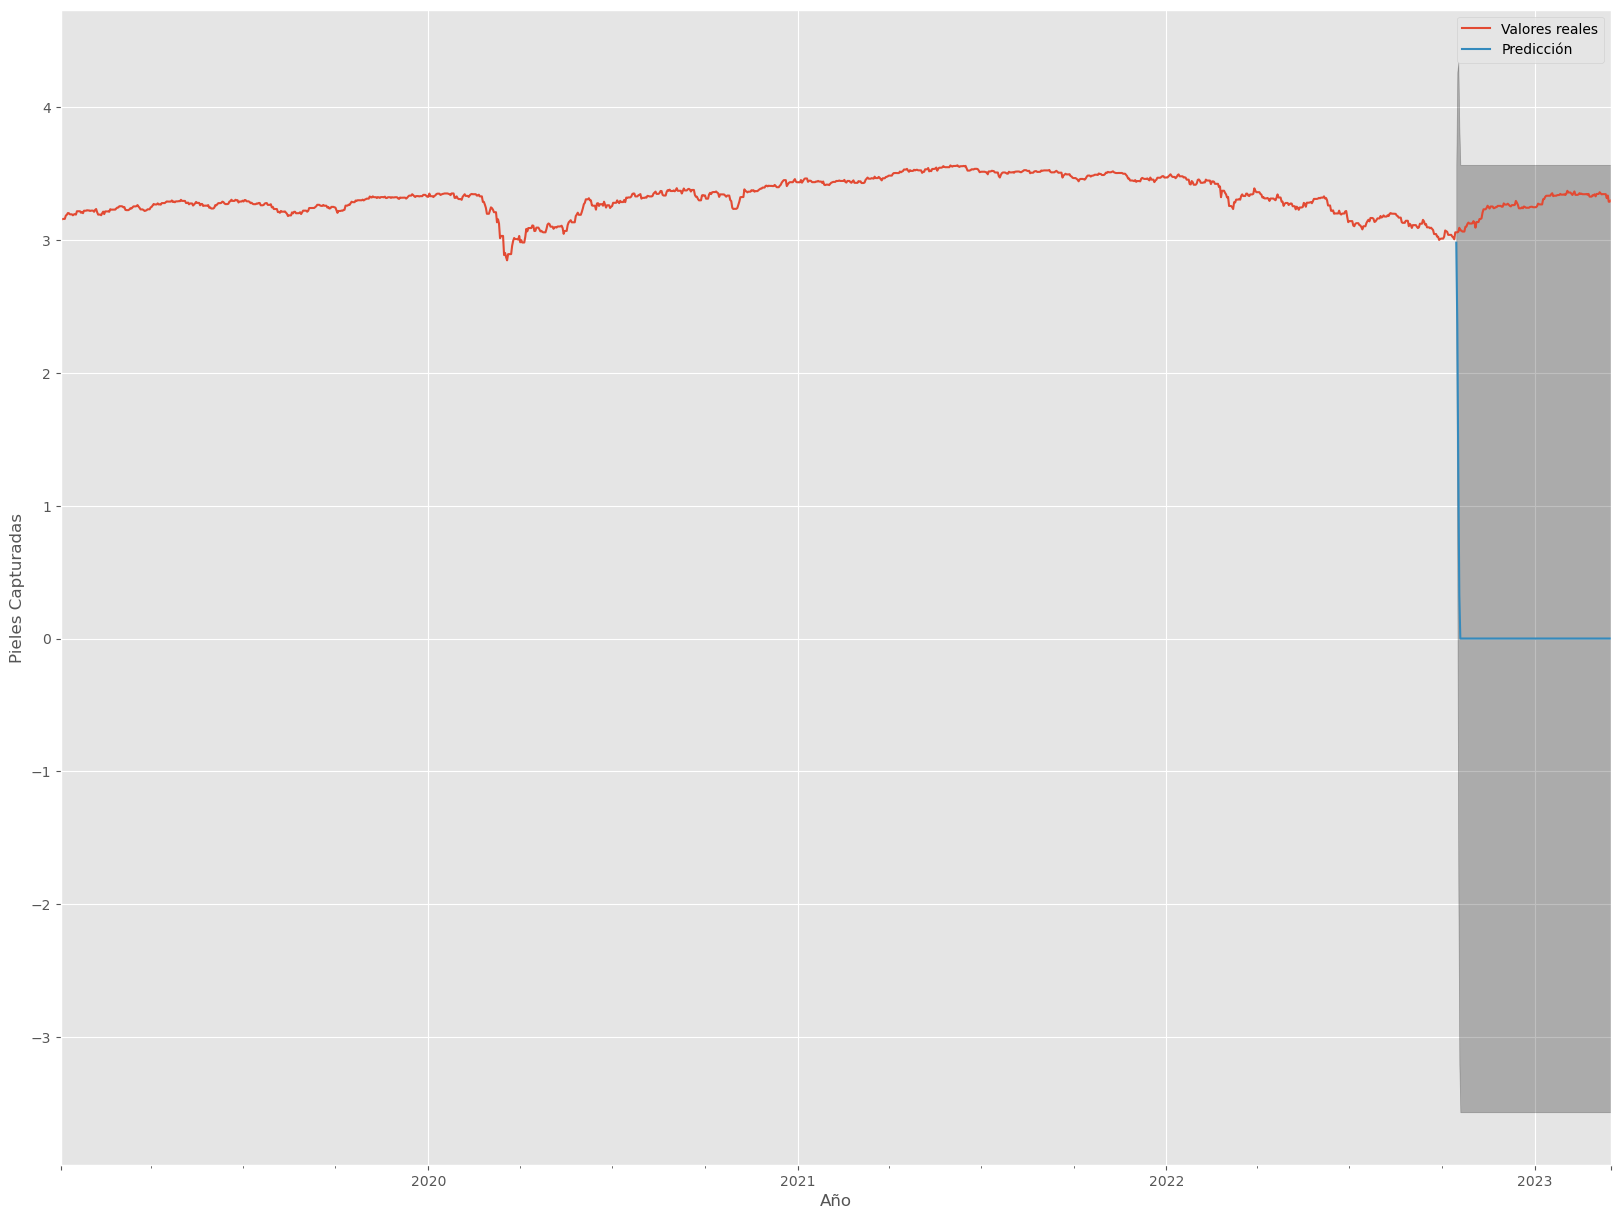

In [61]:
# Para hacer una predicción es suficiente con especificar el número de steps/pasos futuros a estimar.
pred_uc = results.get_forecast(steps = len(y_test))

# Calcula el intervalo de confianza de la predicción.
pred_ci = pred_uc.conf_int()
ax = serie_a_predecir.plot(label = 'Valores reales', figsize = (20, 15))

pred_uc.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Año')
ax.set_ylabel('Pieles Capturadas')

plt.legend()
plt.show()

## Otras funciones

In [62]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd

# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

In [63]:
from sklearn import metrics
def metrica_desempenio(y_orig, y_predic):
    
    def MAPerror(y_orig, y_predic): 
        y_orig, y_predic = np.array(y_orig), np.array(y_predic)
        return np.mean(np.abs((y_orig- y_predic) / y_orig)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_orig, y_predic)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_orig, y_predic)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_orig, y_predic))}')
    print(f'MAPE is : {MAPerror(y_orig, y_predic)}')
    print(f'R2 is : {metrics.r2_score(y_orig, y_predic)}',end='\n\n')

In [64]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [65]:
Prueba_Dickey_Fuller(stock2["Open"],"Open")

Resultados de la prueba de Dickey-Fuller para columna: Open
Test Statistic                          -1.990748
p-value                                  0.290645
No Lags Used                            10.000000
Número de observaciones utilizadas    1525.000000
Critical Value (1%)                     -3.434645
Critical Value (5%)                     -2.863437
Critical Value (10%)                    -2.567780
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [66]:
stock2

,Open,High,Low,Close,Volume,Open_log,Open_log_diff
Date,,,,,,,
2019-01-02,23.521999,23.570,23.420000,23.549999,3700,3.157936,NaN
2019-01-03,23.490000,23.490,23.209999,23.250000,7000,3.156575,-0.001361
2019-01-04,23.580000,24.188,23.580000,24.188000,2600,3.160399,0.003824
2019-01-05,23.580000,24.188,23.580000,24.188000,2600,3.160399,0.000000
2019-01-06,23.580000,24.188,23.580000,24.188000,2600,3.160399,0.000000
...,...,...,...,...,...,...,...
2023-03-13,27.570000,27.848,27.450001,27.660000,25300,3.316728,-0.030013
2023-03-14,28.120001,28.240,28.030001,28.171000,10900,3.336481,0.019753
2023-03-15,26.840000,27.170,26.709999,27.080000,36000,3.289893,-0.046588


In [67]:
Prueba_Dickey_Fuller(stock2["Open_diff"],"furniture_diff")

NameError: name 'df' is not defined